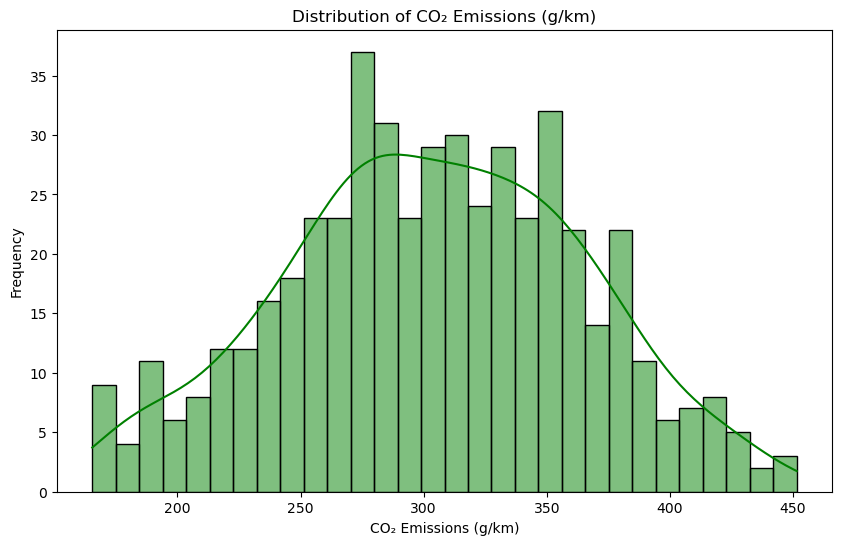

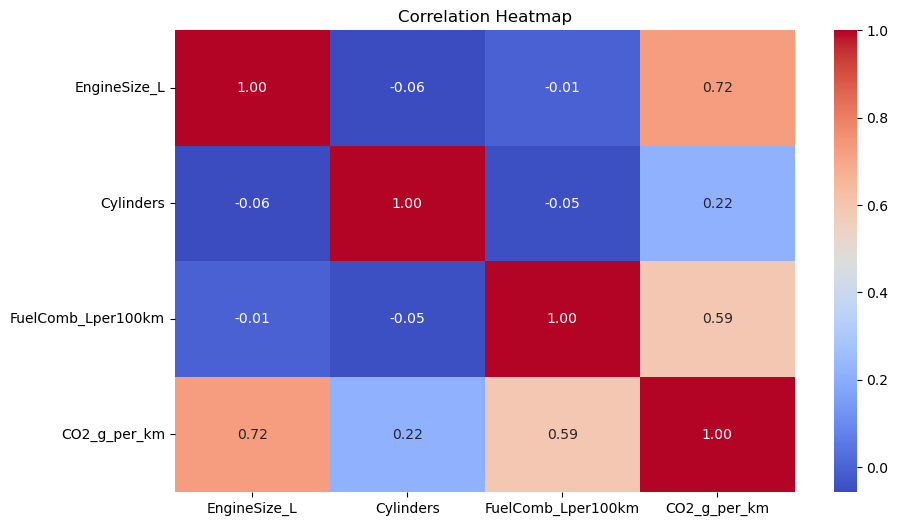

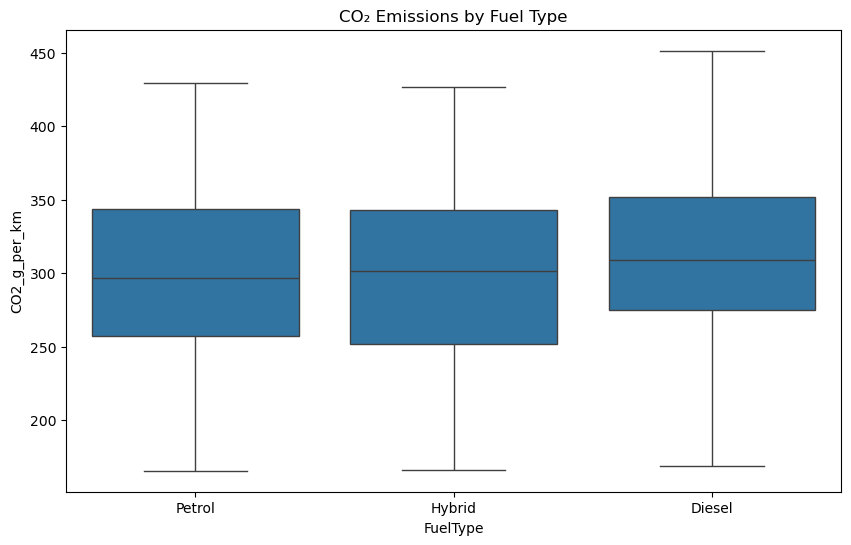

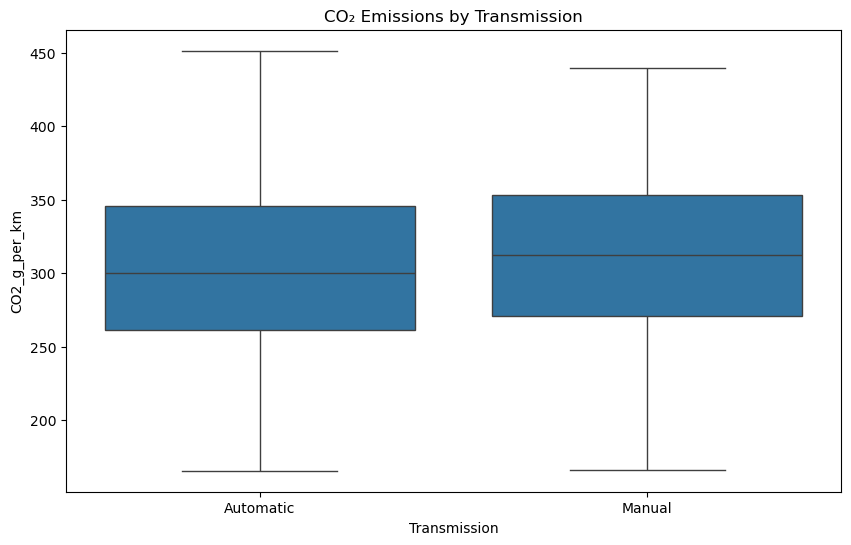

Mean Squared Error = 95.04
R² Score = 0.98


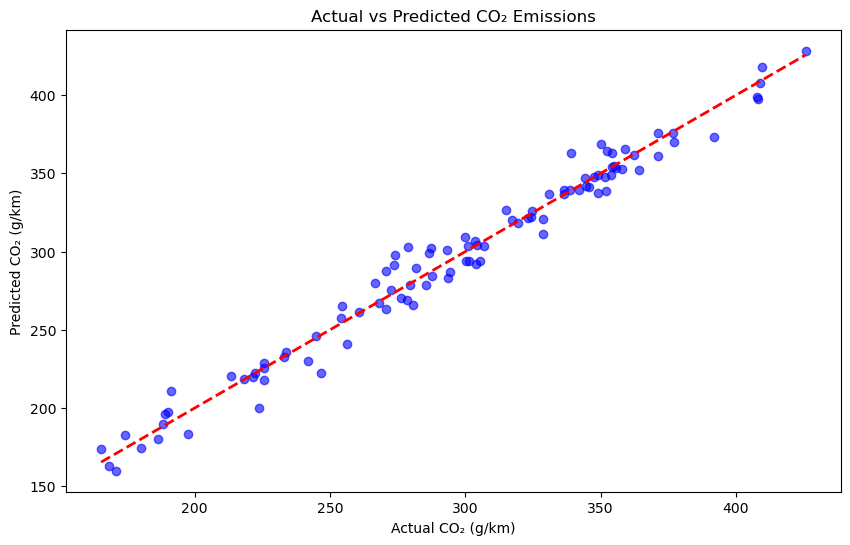

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
n_samples = 500

engine_size = np.random.uniform(1.0, 6.0, n_samples)
cylinders = np.random.choice([3, 4, 5, 6, 8], n_samples)
fuel_comb = np.random.uniform(4.0, 20.0, n_samples)

fuel_types = np.random.choice(['Petrol', 'Diesel', 'Hybrid'], n_samples, p=[0.5, 0.3, 0.2])
transmission = np.random.choice(['Automatic', 'Manual'], n_samples, p=[0.7, 0.3])

co2_emissions = 50 + (engine_size * 30) + (cylinders * 10) + (fuel_comb * 8) 
co2_emissions += np.where(fuel_types=='Diesel', 5, 0)
co2_emissions += np.where(fuel_types=='Hybrid', -10, 0)
co2_emissions += np.random.normal(0, 10, n_samples)

df = pd.DataFrame({
    "EngineSize_L": engine_size,
    "Cylinders": cylinders,
    "FuelComb_Lper100km": fuel_comb,
    "FuelType": fuel_types,
    "Transmission": transmission,
    "CO2_g_per_km": co2_emissions
})

plt.figure(figsize=(10,6))
sns.histplot(df["CO2_g_per_km"], bins=30, kde=True, color='green')
plt.title("Distribution of CO₂ Emissions (g/km)")
plt.xlabel("CO₂ Emissions (g/km)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[["EngineSize_L","Cylinders","FuelComb_Lper100km","CO2_g_per_km"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="FuelType", y="CO2_g_per_km", data=df)
plt.title("CO₂ Emissions by Fuel Type")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Transmission", y="CO2_g_per_km", data=df)
plt.title("CO₂ Emissions by Transmission")
plt.show()

df_encoded = pd.get_dummies(df, columns=['FuelType','Transmission'], drop_first=True)

X = df_encoded.drop('CO2_g_per_km', axis=1)
y = df_encoded['CO2_g_per_km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error = {mse:.2f}")
print(f"R² Score = {r2:.2f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', linewidth=2, color='red')
plt.title("Actual vs Predicted CO₂ Emissions")
plt.xlabel("Actual CO₂ (g/km)")
plt.ylabel("Predicted CO₂ (g/km)")
plt.show()
